# GRAPHS
This notebook reads jobs_info.csv and provides some visual information about the distribution of the jobs.

In [1]:
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.options.display.float_format = None

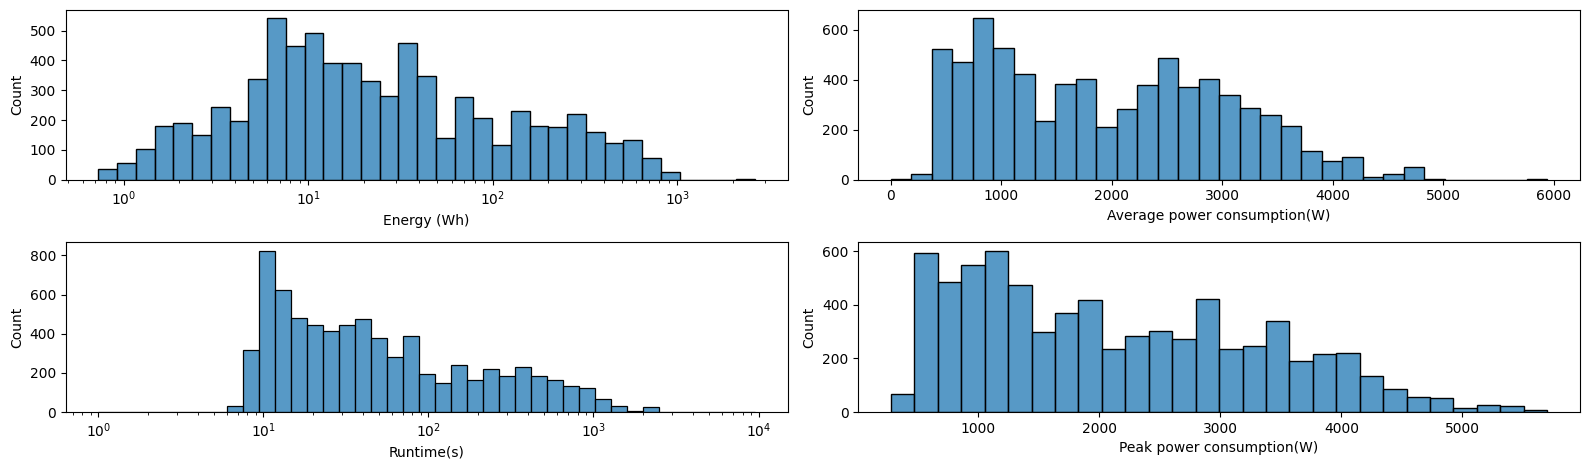

In [2]:
df= pd.read_csv('jobs_info.csv', index_col="jobid")
#df= df.loc[df['error_code'] != 0]
df.energy_from_delta_e *=1000
#df=df.sort_values(by = 'energy_from_delta_e', ascending = False)


fig, axs = plt.subplots(2, 2)
fig.set_figwidth(16)
ax1=sns.histplot(data=df, x="energy_from_delta_e",log_scale=True, ax=axs[0, 0])
ax1.set(xlabel='Energy (Wh)', ylabel='Count')
ax2=sns.histplot(data=df, x="runtime",log_scale=True,ax=axs[1, 0])
ax2.set(xlabel='Runtime(s)', ylabel='Count')
ax3=sns.histplot(data=df, x="mean_sys_power_from_delta_e",ax=axs[0, 1])
ax3.set(xlabel='Average power consumption(W)', ylabel='Count')
ax4=sns.histplot(data=df, x="max_sys_power",ax=axs[1, 1])
ax4.set(xlabel='Peak power consumption(W)', ylabel='Count')
plt.tight_layout()

#ax=sns.histplot(data=df, x="energy",log_scale=True,)
#ax.set(xlabel='Energy (Wh)', ylabel='Count', title='Distribution of Total Energy')

In [3]:
print(df['number_of_nodes'].unique())

[ 3.  4.  5.  6.  7.  8.  9. 10. 12. 11. 14. 13. 16.  2. nan]


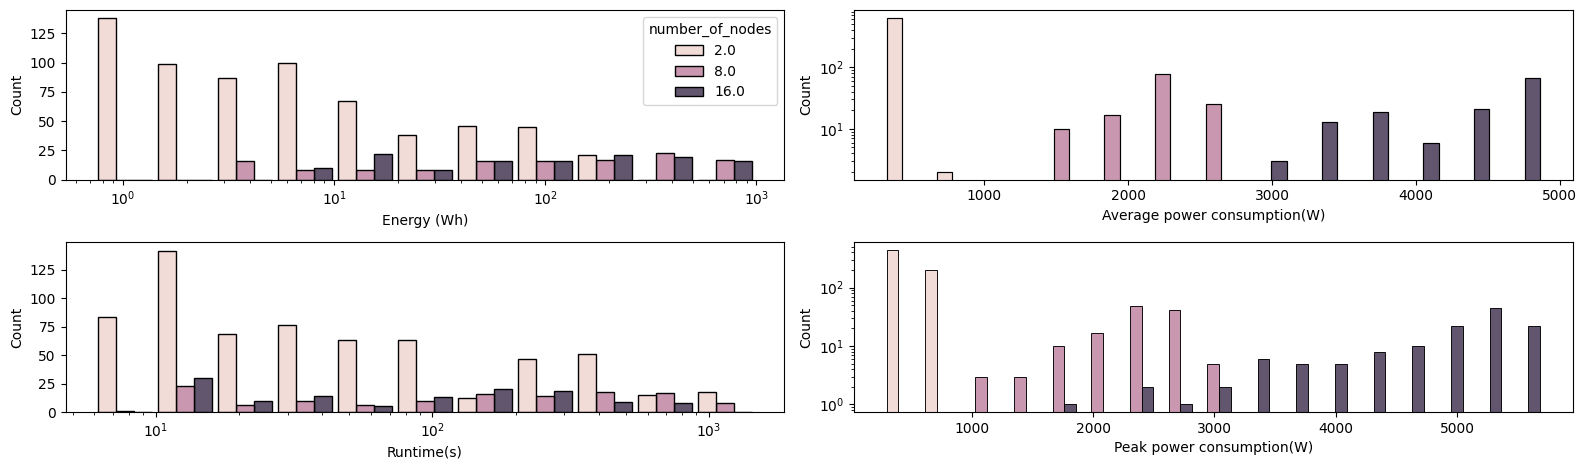

In [4]:
# 'Distribution when different number of nodes are employed'

df_by_nodes = df.loc[df['number_of_nodes'].isin([2,8,16])]

fig, axs = plt.subplots(2, 2)
fig.set_figwidth(16)
ax1=sns.histplot(data=df_by_nodes, x="energy_from_delta_e",hue = "number_of_nodes",log_scale=True,multiple="dodge", ax=axs[0, 0],shrink=.9)
ax1.set(xlabel='Energy (Wh)', ylabel='Count')
sns.move_legend(ax1, "upper right")
ax2=sns.histplot(data=df_by_nodes, x="runtime",hue = "number_of_nodes",log_scale=True,multiple="dodge", ax=axs[1, 0],shrink=.9)
ax2.set(xlabel='Runtime(s)', ylabel='Count')
ax2.get_legend().set_visible(False)
ax3=sns.histplot(data=df_by_nodes, x="mean_sys_power_from_delta_e",hue = "number_of_nodes",multiple="dodge", ax=axs[0,1],shrink=.9)
ax3.set(xlabel='Average power consumption(W)', ylabel='Count', yscale="log")
ax3.get_legend().set_visible(False)
ax4=sns.histplot(data=df_by_nodes, x="max_sys_power",hue = "number_of_nodes",multiple="dodge", ax=axs[1,1],shrink=.9)
ax4.set(xlabel='Peak power consumption(W)', ylabel='Count', yscale="log")
ax4.get_legend().set_visible(False)

plt.tight_layout()

[21120. 26400.  5280. 10560. 15840. 31680. 36960. 42240.    nan]


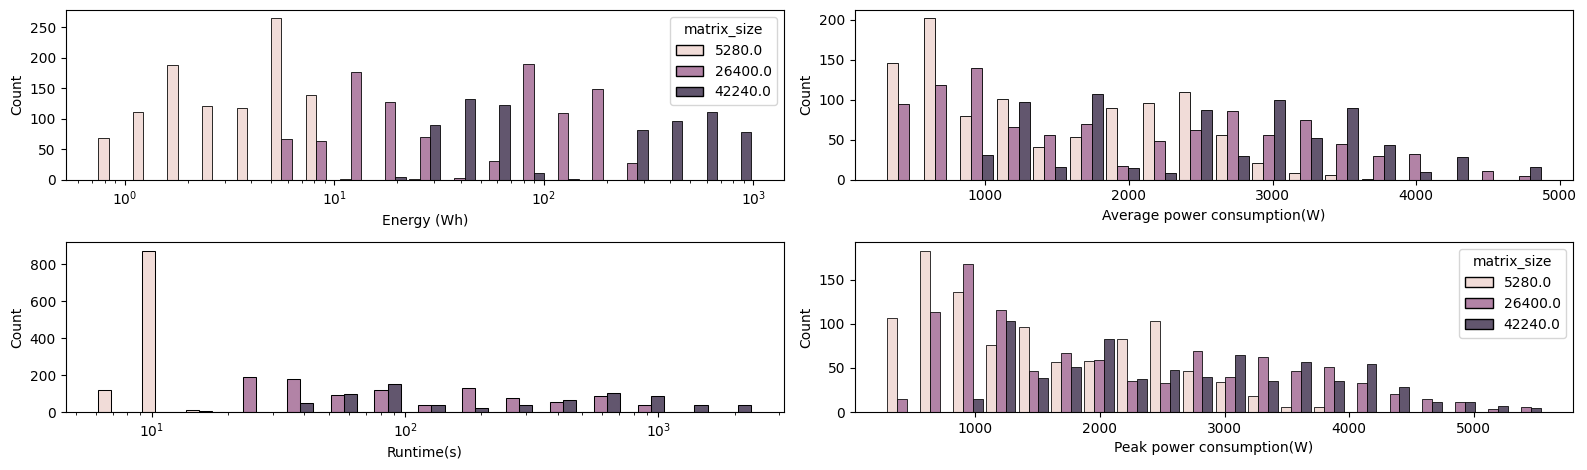

In [5]:
# 'Distributions when computing matrices of different sizes'

print(df['matrix_size'].unique())
df_by_nodes = df.loc[df['matrix_size'].isin([5280,26400,42240])]

fig, axs = plt.subplots(2, 2)
fig.set_figwidth(16)
ax1=sns.histplot(data=df_by_nodes, x="energy_from_delta_e",hue = "matrix_size",log_scale=True,multiple="dodge", ax=axs[0, 0],shrink=.9)
ax1.set(xlabel='Energy (Wh)', ylabel='Count')
ax2=sns.histplot(data=df_by_nodes, x="runtime",hue = "matrix_size",log_scale=True,multiple="dodge", ax=axs[1, 0],shrink=.9)
ax2.set(xlabel='Runtime(s)', ylabel='Count')
ax2.get_legend().set_visible(False)
ax3=sns.histplot(data=df_by_nodes, x="mean_sys_power_from_delta_e",hue = "matrix_size",multiple="dodge", ax=axs[0,1],shrink=.9)
ax3.set(xlabel='Average power consumption(W)', ylabel='Count')
ax3.get_legend().set_visible(False)
ax4=sns.histplot(data=df_by_nodes, x="max_sys_power",hue = "matrix_size",multiple="dodge", ax=axs[1,1],shrink=.9)
ax4.set(xlabel='Peak power consumption(W)', ylabel='Count')
ax2.get_legend().set_visible(False)

plt.tight_layout()

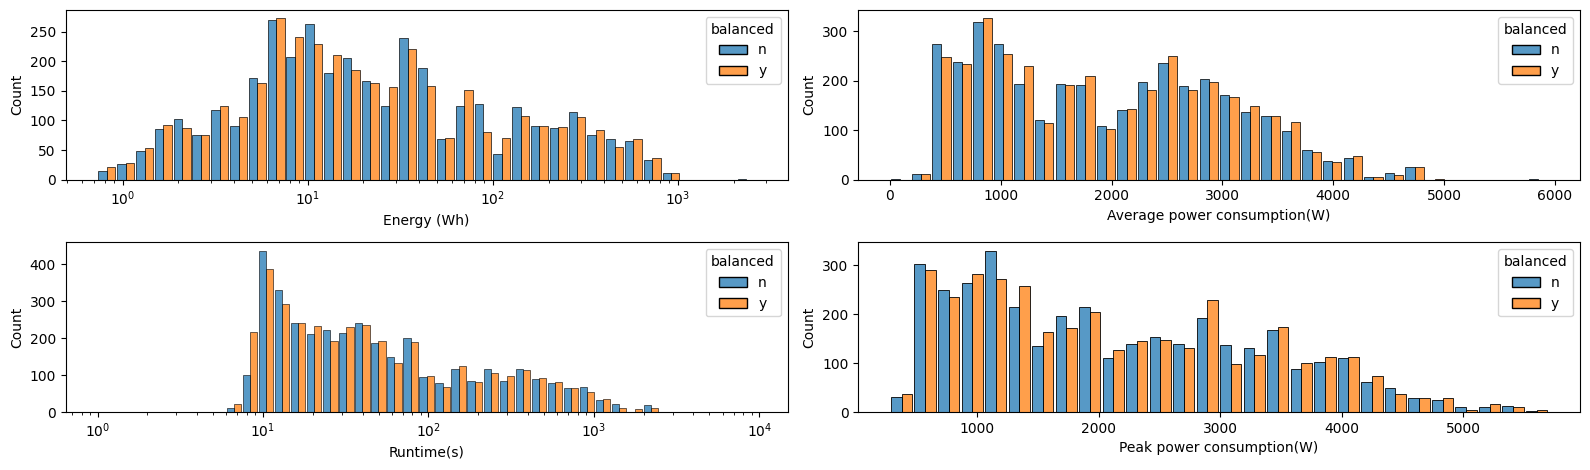

In [6]:
# 'Distributions when balanced/unbalanced'
df_by_nodes = df

fig, axs = plt.subplots(2, 2)
fig.set_figwidth(16)
ax1=sns.histplot(data=df_by_nodes, x="energy_from_delta_e",hue = "balanced",log_scale=True,multiple="dodge", ax=axs[0, 0],shrink=.9)
ax1.set(xlabel='Energy (Wh)', ylabel='Count')
ax2=sns.histplot(data=df_by_nodes, x="runtime",hue = "balanced",log_scale=True,multiple="dodge", ax=axs[1, 0],shrink=.9)
ax2.set(xlabel='Runtime(s)', ylabel='Count')
ax3=sns.histplot(data=df_by_nodes, x="mean_sys_power_from_delta_e",hue = "balanced",multiple="dodge", ax=axs[0,1],shrink=.9)
ax3.set(xlabel='Average power consumption(W)', ylabel='Count')
ax4=sns.histplot(data=df_by_nodes, x="max_sys_power",hue = "balanced",multiple="dodge", ax=axs[1,1],shrink=.9)
ax4.set(xlabel='Peak power consumption(W)', ylabel='Count')
plt.tight_layout()

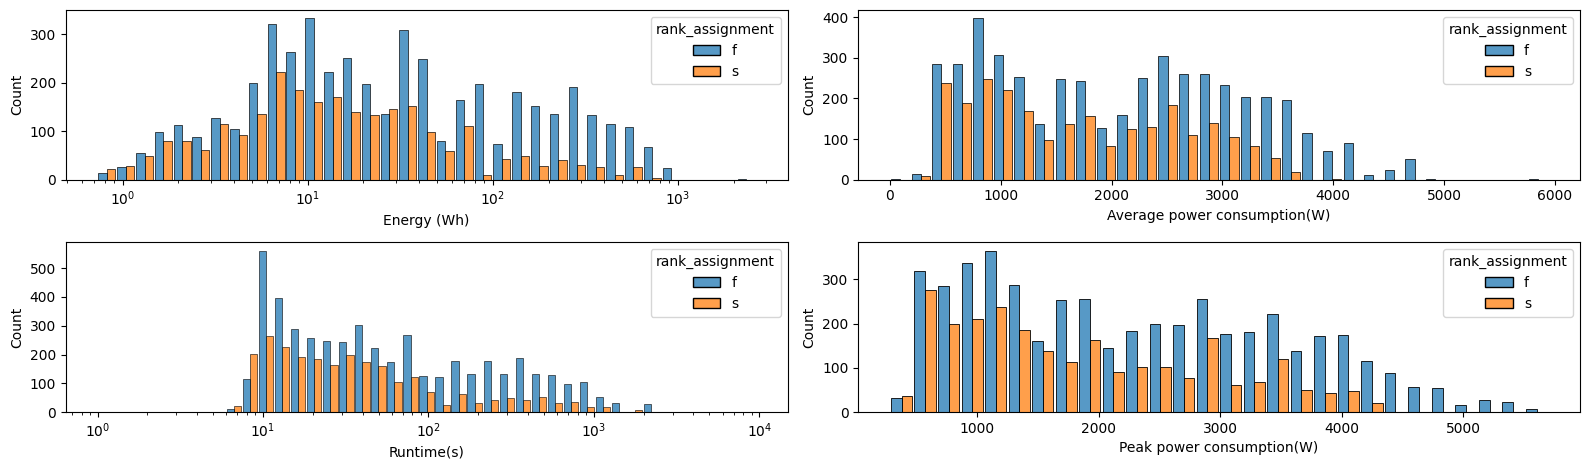

In [7]:
#print(df['total_proc'].unique())

# 'Distributions when nodes are full or not'

fig, axs = plt.subplots(2, 2)
fig.set_figwidth(16)
ax1=sns.histplot(data=df_by_nodes, x="energy_from_delta_e",hue = "rank_assignment",log_scale=True,multiple="dodge", ax=axs[0, 0],shrink=.9)
ax1.set(xlabel='Energy (Wh)', ylabel='Count')
ax2=sns.histplot(data=df_by_nodes, x="runtime",hue = "rank_assignment",log_scale=True,multiple="dodge", ax=axs[1, 0],shrink=.9)
ax2.set(xlabel='Runtime(s)', ylabel='Count')
ax3=sns.histplot(data=df_by_nodes, x="mean_sys_power_from_delta_e",hue = "rank_assignment",multiple="dodge", ax=axs[0,1],shrink=.9)
ax3.set(xlabel='Average power consumption(W)', ylabel='Count')
ax4=sns.histplot(data=df_by_nodes, x="max_sys_power",hue = "rank_assignment",multiple="dodge", ax=axs[1,1],shrink=.9)
ax4.set(xlabel='Peak power consumption(W)', ylabel='Count')
plt.tight_layout()

[ 0.  1.  2.  4.  8. nan]


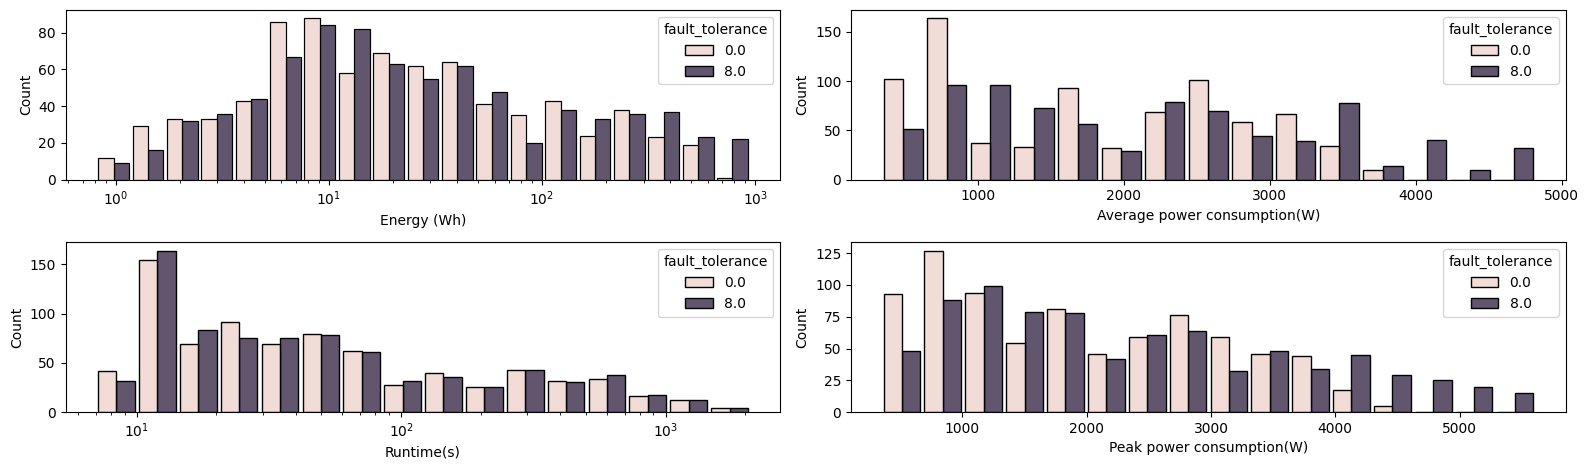

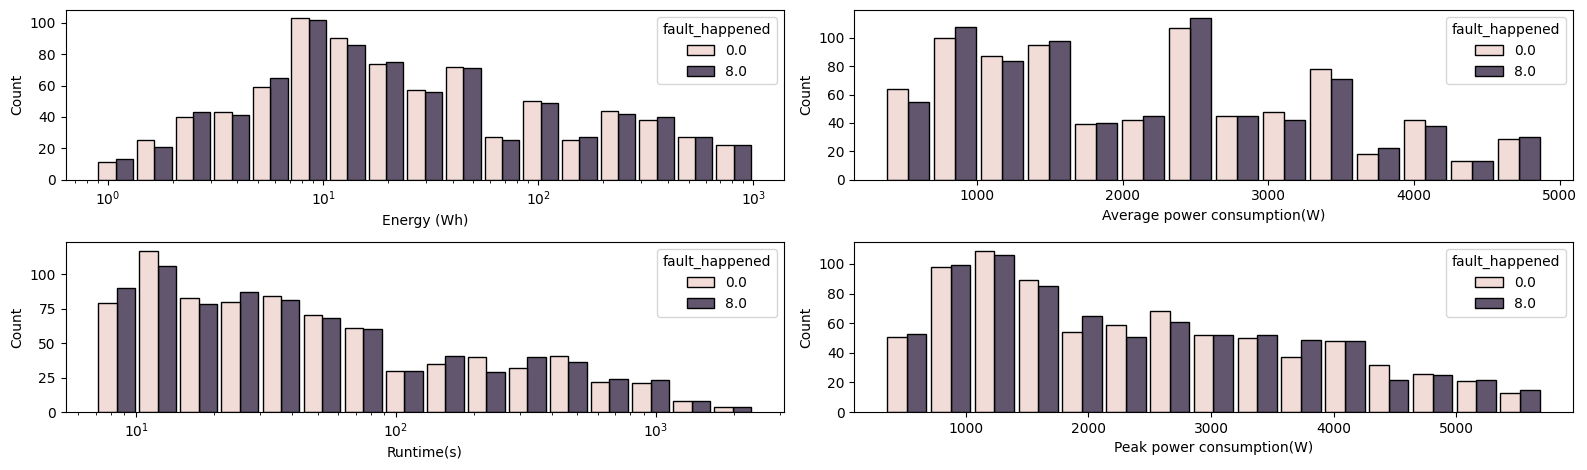

In [8]:
jdf = pd.read_csv('jobs_data.csv', index_col=None,header=0)
filtered_jdf_df = jdf.filter(['jobid','fault_tolerance','fault_happened'], axis=1)
filtered_jdf_df.head()
info_df=df.join(filtered_jdf_df.set_index('jobid'), on='jobid')
print(info_df['fault_tolerance'].unique())
info_df_t = info_df.loc[info_df['fault_tolerance'].isin([0,8]) & info_df['fault_happened'].isin([0])]

fig, axs = plt.subplots(2, 2)
fig.set_figwidth(16)
ax1=sns.histplot(data=info_df_t, x="energy_from_delta_e",hue = "fault_tolerance",log_scale=True,multiple="dodge", ax=axs[0, 0],shrink=.9)
ax1.set(xlabel='Energy (Wh)', ylabel='Count')
ax2=sns.histplot(data=info_df_t, x="runtime",hue = "fault_tolerance",log_scale=True,multiple="dodge", ax=axs[1, 0],shrink=.9)
ax2.set(xlabel='Runtime(s)', ylabel='Count')
ax3=sns.histplot(data=info_df_t, x="mean_sys_power_from_delta_e",hue = "fault_tolerance",multiple="dodge", ax=axs[0,1],shrink=.9)
ax3.set(xlabel='Average power consumption(W)', ylabel='Count')
ax4=sns.histplot(data=info_df_t, x="max_sys_power",hue = "fault_tolerance",multiple="dodge", ax=axs[1,1],shrink=.9)
ax4.set(xlabel='Peak power consumption(W)', ylabel='Count')
plt.tight_layout()

#print(info_df['fault_happened'].unique())
info_df_h = info_df.loc[info_df['fault_happened'].isin([0,8]) & info_df['fault_tolerance'].isin([8]) ]

fig, axs = plt.subplots(2, 2)
fig.set_figwidth(16)
ax1=sns.histplot(data=info_df_h, x="energy_from_delta_e",hue = "fault_happened",log_scale=True,multiple="dodge", ax=axs[0, 0],shrink=.9)
ax1.set(xlabel='Energy (Wh)', ylabel='Count')
ax2=sns.histplot(data=info_df_h, x="runtime",hue = "fault_happened",log_scale=True,multiple="dodge", ax=axs[1, 0],shrink=.9)
ax2.set(xlabel='Runtime(s)', ylabel='Count')
ax3=sns.histplot(data=info_df_h, x="mean_sys_power_from_delta_e",hue = "fault_happened",multiple="dodge", ax=axs[0,1],shrink=.9)
ax3.set(xlabel='Average power consumption(W)', ylabel='Count')
ax4=sns.histplot(data=info_df_h, x="max_sys_power",hue = "fault_happened",multiple="dodge", ax=axs[1,1],shrink=.9)
ax4.set(xlabel='Peak power consumption(W)', ylabel='Count')
plt.tight_layout()

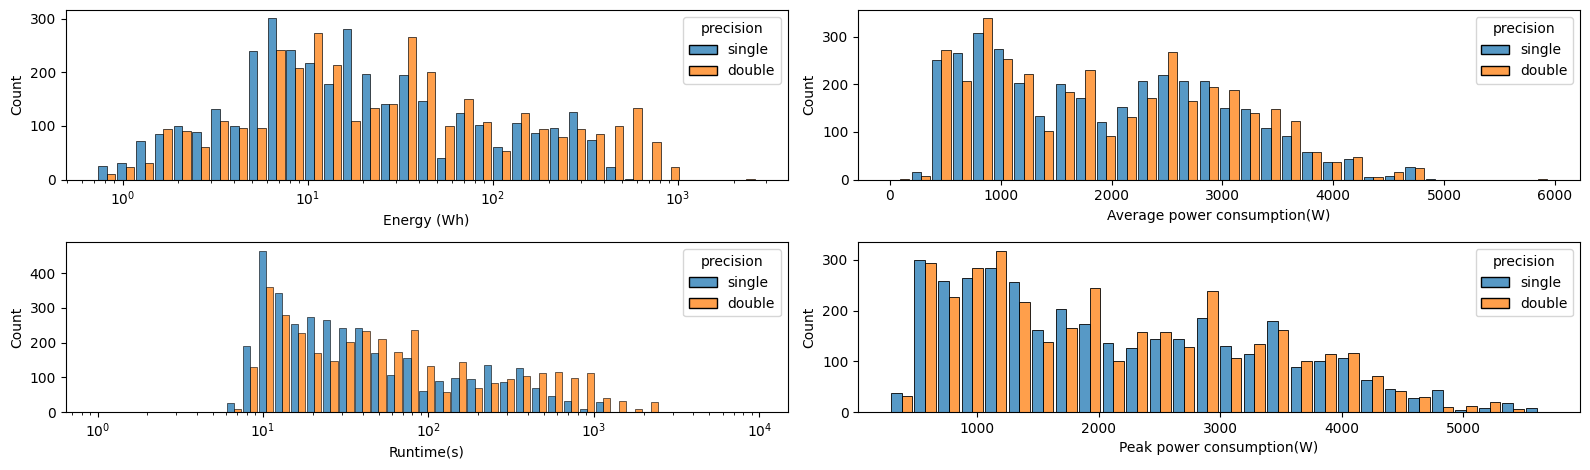

In [9]:
fig, axs = plt.subplots(2, 2)
fig.set_figwidth(16)
ax1=sns.histplot(data=df, x="energy_from_delta_e",hue = "precision",log_scale=True,multiple="dodge", ax=axs[0, 0],shrink=.9)
ax1.set(xlabel='Energy (Wh)', ylabel='Count')
ax2=sns.histplot(data=df, x="runtime",hue = "precision",log_scale=True,multiple="dodge", ax=axs[1, 0],shrink=.9)
ax2.set(xlabel='Runtime(s)', ylabel='Count')
ax3=sns.histplot(data=df, x="mean_sys_power_from_delta_e",hue = "precision",multiple="dodge", ax=axs[0,1],shrink=.9)
ax3.set(xlabel='Average power consumption(W)', ylabel='Count')
ax4=sns.histplot(data=df, x="max_sys_power",hue = "precision",multiple="dodge", ax=axs[1,1],shrink=.9)
ax4.set(xlabel='Peak power consumption(W)', ylabel='Count')
plt.tight_layout()

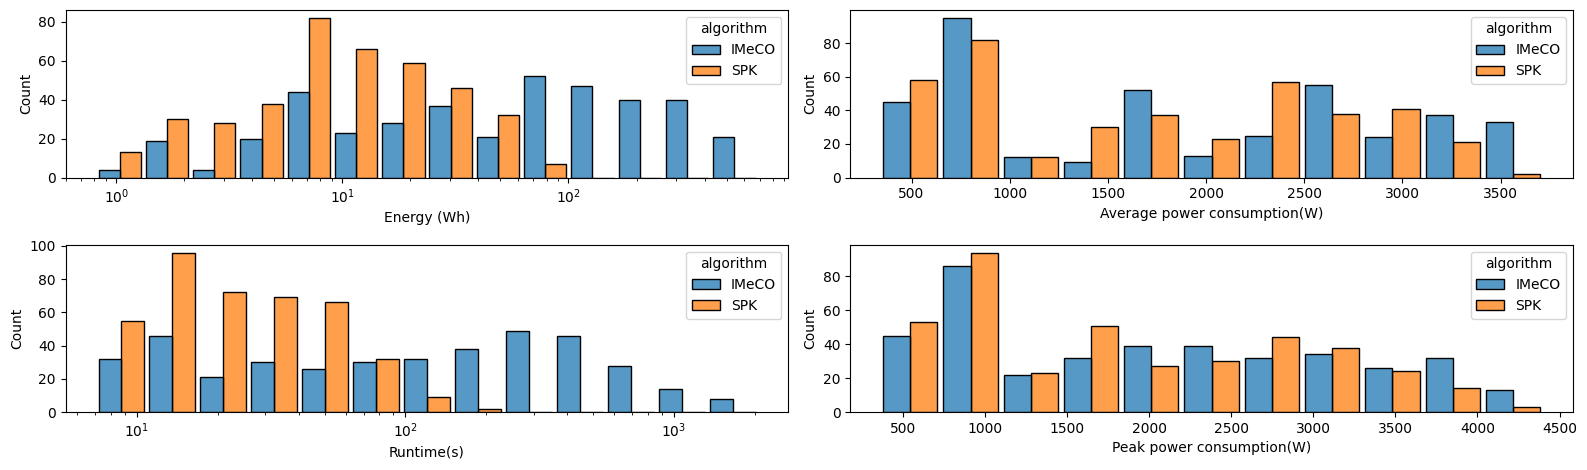

In [10]:
fig, axs = plt.subplots(2, 2)
fig.set_figwidth(16)
df = info_df.loc[info_df['fault_tolerance'].isin([0])]

ax1=sns.histplot(data=df, x="energy_from_delta_e",hue = "algorithm",log_scale=True,multiple="dodge", ax=axs[0, 0],shrink=.9)
ax1.set(xlabel='Energy (Wh)', ylabel='Count')
ax2=sns.histplot(data=df, x="runtime",hue = "algorithm",log_scale=True,multiple="dodge", ax=axs[1, 0],shrink=.9)
ax2.set(xlabel='Runtime(s)', ylabel='Count')
ax3=sns.histplot(data=df, x="mean_sys_power_from_delta_e",hue = "algorithm",multiple="dodge", ax=axs[0,1],shrink=.9)
ax3.set(xlabel='Average power consumption(W)', ylabel='Count')
ax4=sns.histplot(data=df, x="max_sys_power",hue = "algorithm",multiple="dodge", ax=axs[1,1],shrink=.9)
ax4.set(xlabel='Peak power consumption(W)', ylabel='Count')
plt.tight_layout()